In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 7000
embedding_dim = 256
max_length = 15
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [3]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "while", "with", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]
punctuations = '''!()-[]{};:'"`\,<>./?@#$%^&*_~\n'''

In [4]:
category = []
subcategory = []
questions = []

with open('train_5500.label', 'r') as f:
    for line in f:
        split_index1 = line.index(":")
        split_index2 = line.index(" ")
        category.append(line[:split_index1])
        subcategory.append(line[split_index1+1:split_index2])
        questions.append(line[(split_index2+1):])
        
print(category[0])
print(subcategory[0])
print(questions[0:10])

DESC
manner
['How did serfdom develop in and then leave Russia ?\n', 'What films featured the character Popeye Doyle ?\n', "How can I find a list of celebrities ' real names ?\n", 'What fowl grabs the spotlight after the Chinese Year of the Monkey ?\n', 'What is the full form of .com ?\n', 'What contemptible scoundrel stole the cork from my lunch ?\n', "What team did baseball 's St. Louis Browns become ?\n", 'What is the oldest profession ?\n', 'What are liver enzymes ?\n', 'Name the scar-faced bounty hunter of The Old West .\n']


In [5]:
for i in range(0,len(questions)):
    question = questions[i].lower()
#     for word in stopwords:
#         token = " " + word + " "
#         question = question.replace(token, " ")
    no_punct = ''
    for char in question:
        if char not in punctuations:
            no_punct = no_punct + char
    no_punct = no_punct.replace("  ", " ")
    questions[i] = no_punct

print(len(category))
print(len(questions))
print(questions[0:10])

5452
5452
['how did serfdom develop in and then leave russia ', 'what films featured the character popeye doyle ', 'how can i find a list of celebrities real names ', 'what fowl grabs the spotlight after the chinese year of the monkey ', 'what is the full form of com ', 'what contemptible scoundrel stole the cork from my lunch ', 'what team did baseball s st louis browns become ', 'what is the oldest profession ', 'what are liver enzymes ', 'name the scarfaced bounty hunter of the old west ']


In [6]:
test_category = []
test_subcategory = []
test_questions = []

with open('TREC_10.label', 'r') as f:
    for line in f:
        split_index1 = line.index(":")
        split_index2 = line.index(" ")
        test_category.append(line[:split_index1])
        test_subcategory.append(line[split_index1+1:split_index2])
        test_questions.append(line[(split_index2+1):])
        
print(test_category[0])
print(test_subcategory[0])
print(test_questions[0:10])

NUM
dist
['How far is it from Denver to Aspen ?\n', 'What county is Modesto , California in ?\n', 'Who was Galileo ?\n', 'What is an atom ?\n', 'When did Hawaii become a state ?\n', 'How tall is the Sears Building ?\n', 'George Bush purchased a small interest in which baseball team ?\n', "What is Australia 's national flower ?\n", 'Why does the moon turn orange ?\n', 'What is autism ?\n']


In [7]:
for i in range(0,len(test_questions)):
    test_question = test_questions[i].lower()
#     for word in stopwords:
#         token = " " + word + " "
#         test_question = test_question.replace(token, " ")
    no_punct = ''
    for char in test_question:
        if char not in punctuations:
            no_punct = no_punct + char
    no_punct = no_punct.replace("  ", " ")
    test_questions[i] = no_punct

print(len(test_category))
print(len(test_questions))
print(test_questions[0:10])

500
500
['how far is it from denver to aspen ', 'what county is modesto california in ', 'who was galileo ', 'what is an atom ', 'when did hawaii become a state ', 'how tall is the sears building ', 'george bush purchased a small interest in which baseball team ', 'what is australia s national flower ', 'why does the moon turn orange ', 'what is autism ']


In [8]:
train_questions = questions
train_category = category
train_subcategory = subcategory

validation_questions = test_questions
validation_category = test_category
validation_subcategory = test_subcategory

print(len(train_questions))
print(len(train_category))
print(len(validation_questions))
print(len(validation_category))

5452
5452
500
500


In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_questions)
word_index = tokenizer.word_index
print(len(word_index))

train_sequences = tokenizer.texts_to_sequences(train_questions)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

8605
9
15
7
15


In [10]:
validation_sequences = tokenizer.texts_to_sequences(validation_questions)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

500
(500, 15)


In [11]:
category_tokenizer = Tokenizer()
category_tokenizer.fit_on_texts(category)
category_word_index = category_tokenizer.word_index

training_category_seq = pad_sequences(np.array(category_tokenizer.texts_to_sequences(train_category)), maxlen=1)
validation_category_seq = pad_sequences(np.array(category_tokenizer.texts_to_sequences(validation_category)), maxlen=1)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv1D(128, 3, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=2),    
#     tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'sigmoid'),
    tf.keras.layers.Dense(7, activation = 'softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.002), metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 256)           1792000   
_________________________________________________________________
dropout (Dropout)            (None, 15, 256)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 128)           164352    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 2

In [13]:
num_epochs = 10
history = model.fit(train_padded, training_category_seq, epochs = num_epochs, validation_data=(validation_padded[:-5], validation_category_seq[:-5]), verbose = 2)

Train on 5452 samples, validate on 495 samples
Epoch 1/10
5452/5452 - 47s - loss: 1.4239 - acc: 0.4120 - val_loss: 1.0306 - val_acc: 0.5515
Epoch 2/10
5452/5452 - 21s - loss: 0.8120 - acc: 0.7298 - val_loss: 0.6468 - val_acc: 0.8242
Epoch 3/10
5452/5452 - 17s - loss: 0.4615 - acc: 0.8777 - val_loss: 0.6212 - val_acc: 0.8364
Epoch 4/10
5452/5452 - 17s - loss: 0.2996 - acc: 0.9224 - val_loss: 0.6675 - val_acc: 0.8101
Epoch 5/10
5452/5452 - 17s - loss: 0.2266 - acc: 0.9430 - val_loss: 0.5988 - val_acc: 0.8465
Epoch 6/10
5452/5452 - 17s - loss: 0.1730 - acc: 0.9587 - val_loss: 0.5814 - val_acc: 0.8545
Epoch 7/10
5452/5452 - 17s - loss: 0.1564 - acc: 0.9618 - val_loss: 0.7409 - val_acc: 0.8384
Epoch 8/10
5452/5452 - 17s - loss: 0.1365 - acc: 0.9668 - val_loss: 0.5232 - val_acc: 0.8606
Epoch 9/10
5452/5452 - 17s - loss: 0.1126 - acc: 0.9736 - val_loss: 0.6056 - val_acc: 0.8485
Epoch 10/10
5452/5452 - 17s - loss: 0.1136 - acc: 0.9749 - val_loss: 0.6137 - val_acc: 0.8606


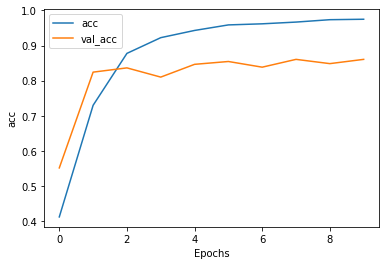

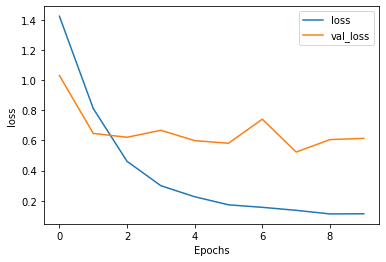

In [14]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [15]:
# print(category_word_index)
# print(model.predict(validation_padded[-5:]))
# print(validation_category_seq[-5:])
# print(validation_questions[-5:])

In [16]:
subcategory_tokenizer = Tokenizer()
subcategory_tokenizer.fit_on_texts(subcategory)

training_subcategory_seq = pad_sequences(np.array(subcategory_tokenizer.texts_to_sequences(train_subcategory)), maxlen=1)
validation_subcategory_seq = pad_sequences(np.array(subcategory_tokenizer.texts_to_sequences(validation_subcategory)), maxlen=1)

In [19]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(96, return_sequences=True)),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(48, activation = 'softmax')
])

model1.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 256)           1792000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 256)           0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_6 (Dense)              (None, 48)                1584      
Total params: 1,801,808
Trainable params: 1,801,808
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 10
history1 = model1.fit((train_padded, training_category_seq), training_subcategory_seq, epochs = num_epochs, validation_data=((validation_padded, validation_category_seq), validation_subcategory_seq), verbose = 2)

Train on 5452 samples, validate on 500 samples
Epoch 1/10
5452/5452 - 7s - loss: 3.2532 - acc: 0.1695 - val_loss: 2.9964 - val_acc: 0.2000
Epoch 2/10
5452/5452 - 6s - loss: 2.5296 - acc: 0.3388 - val_loss: 2.4994 - val_acc: 0.2820
Epoch 3/10
5452/5452 - 6s - loss: 2.0158 - acc: 0.4696 - val_loss: 2.1139 - val_acc: 0.5640
Epoch 4/10
5452/5452 - 6s - loss: 1.5197 - acc: 0.6313 - val_loss: 1.7774 - val_acc: 0.5980
Epoch 5/10
5452/5452 - 6s - loss: 1.1010 - acc: 0.7456 - val_loss: 1.5337 - val_acc: 0.6580
Epoch 6/10
5452/5452 - 6s - loss: 0.8185 - acc: 0.8171 - val_loss: 1.3665 - val_acc: 0.6740
Epoch 7/10
5452/5452 - 6s - loss: 0.6237 - acc: 0.8683 - val_loss: 1.2909 - val_acc: 0.7020
Epoch 8/10
5452/5452 - 6s - loss: 0.4844 - acc: 0.8988 - val_loss: 1.2035 - val_acc: 0.7260
Epoch 9/10
5452/5452 - 6s - loss: 0.3762 - acc: 0.9252 - val_loss: 1.1631 - val_acc: 0.7320
Epoch 10/10
5452/5452 - 6s - loss: 0.2954 - acc: 0.9431 - val_loss: 1.1033 - val_acc: 0.7300


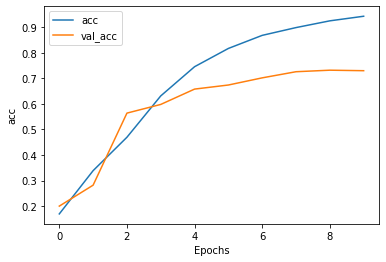

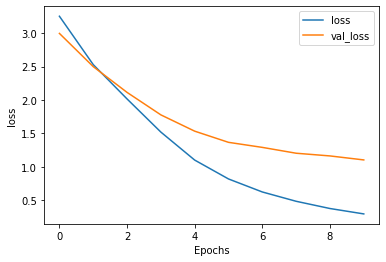

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history1, "acc")
plot_graphs(history1, "loss")